In [1]:
from SupertypeTools import CalcMat, CGCalcMat, heatmap, Matrix2Dendro

contact = [7,9,24,45,59,62,63,66,67,69,70,73,74,76,77,80,81,84,95,97,99,114,116,118,143,147,150,152,156,158,159,163,167,171]
weight = {3:[7,9,24,45,62,63,66,67,70,74,77,80,81,84,95,97,99,116,118,143,147,159]}

### === Figure 1: rmsd between crystal structure and mean crystal structure ===

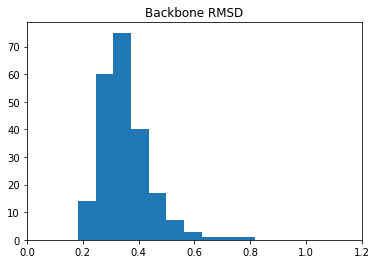

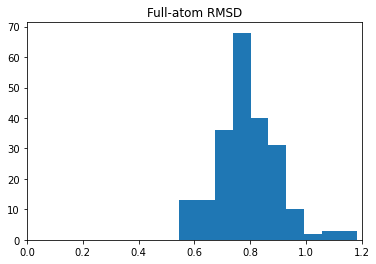

In [63]:
import os
from pymol import cmd

import matplotlib.pyplot as plt

def FA_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    FA_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):

            cmd.load(f"{InDir}/{InPDB}", "target")

            FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0] # full-atom RMSD

            FA_RMSD_list.append(FA_RMSD)

            cmd.delete("target")

    cmd.delete("template")
    return FA_RMSD_list

def BB_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    BB_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):

            cmd.load(f"{InDir}/{InPDB}", "target")

            BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0] # backbone RMSD

            BB_RMSD_list.append(BB_RMSD)

            cmd.delete("target")

    cmd.delete("template")
    return BB_RMSD_list

def hm_RMSD(InPDB, refPDB):
    cmd.load(refPDB, "template")
    cmd.load(InPDB, "target")

    BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0]
    FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0]

    return BB_RMSD, FA_RMSD

RMSD_allele_list = ["A01_01", "A02_01", "A02_06", "A03_01", "A11_01", "A23_01", "A24_02", "A30_03", "A68_01"]

BB_full = []
FA_full = []

for allele in RMSD_allele_list:
    FA_RMSD_list = FA_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/A_mean/PDB/{allele}.pdb")
    BB_RMSD_list = BB_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/A_mean/PDB/{allele}.pdb")
    BB_full.extend(BB_RMSD_list)
    FA_full.extend(FA_RMSD_list)

plt.figure()
plt.hist(BB_full)
plt.title("Backbone RMSD")
plt.xlim((0,1.2))
plt.show()

plt.figure()
plt.hist(FA_full)
plt.title("Full-atom RMSD")
plt.xlim((0,1.2))
plt.show()
# print(BB_RMSD_list_full, RMSD_list_full)

### === Figure 2: clustering of reference panel (homology model and mean crystal structure), comping to existing supertypes ===

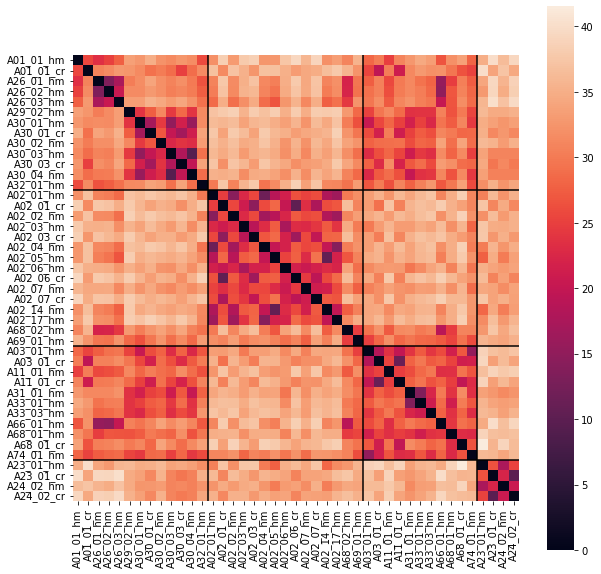

                    /-A68 01 cr
          /--------|
         |         |          /-A01 01 cr
         |          \--------|
         |                   |          /-A11 01 cr
         |                    \--------|
         |                              \-A03 01 cr
         |
         |                    /-A74 01 hm
         |          /--------|
         |         |          \-A03 01 hm
         |         |
         |         |                              /-A30 02 hm
         |         |                             |
         |         |                    /--------|                    /-A30 03 cr
         |         |                   |         |          /--------|
         |         |                   |         |         |          \-A30 01 cr
         |         |                   |          \--------|
         |         |                   |                   |          /-A30 01 hm
         |         |          /--------|                    \--------|
         |---------|

In [2]:
A_order = [
    ['A01_01_hm', 'A01_01_cr', 'A26_01_hm', 'A26_02_hm', 'A26_03_hm', 'A29_02_hm', 'A30_01_hm', 'A30_01_cr', 'A30_02_hm', 'A30_03_hm', 'A30_03_cr', 'A30_04_hm', 'A32_01_hm'],
    ['A02_01_hm', 'A02_01_cr', 'A02_02_hm', 'A02_03_hm', 'A02_03_cr', 'A02_04_hm', 'A02_05_hm', 'A02_06_hm', 'A02_06_cr', 'A02_07_hm', 'A02_07_cr', 'A02_14_hm', 'A02_17_hm', 'A68_02_hm', 'A69_01_hm'],
    ['A03_01_hm', 'A03_01_cr', 'A11_01_hm', 'A11_01_cr', 'A31_01_hm', 'A33_01_hm', 'A33_03_hm', 'A66_01_hm', 'A68_01_hm', 'A68_01_cr', 'A74_01_hm'],
    ['A23_01_hm', 'A23_01_cr', 'A24_02_hm', 'A24_02_cr']
    ]

Mat = CalcMat("../Figures/Figure1_compare_to_existing/HLA-A/DAT", "../Figures/Figure1_compare_to_existing/HLA-A/HLA-A.csv", contact=contact, weight=weight)
heatmap(Mat, A_order)
Matrix2Dendro(Mat)

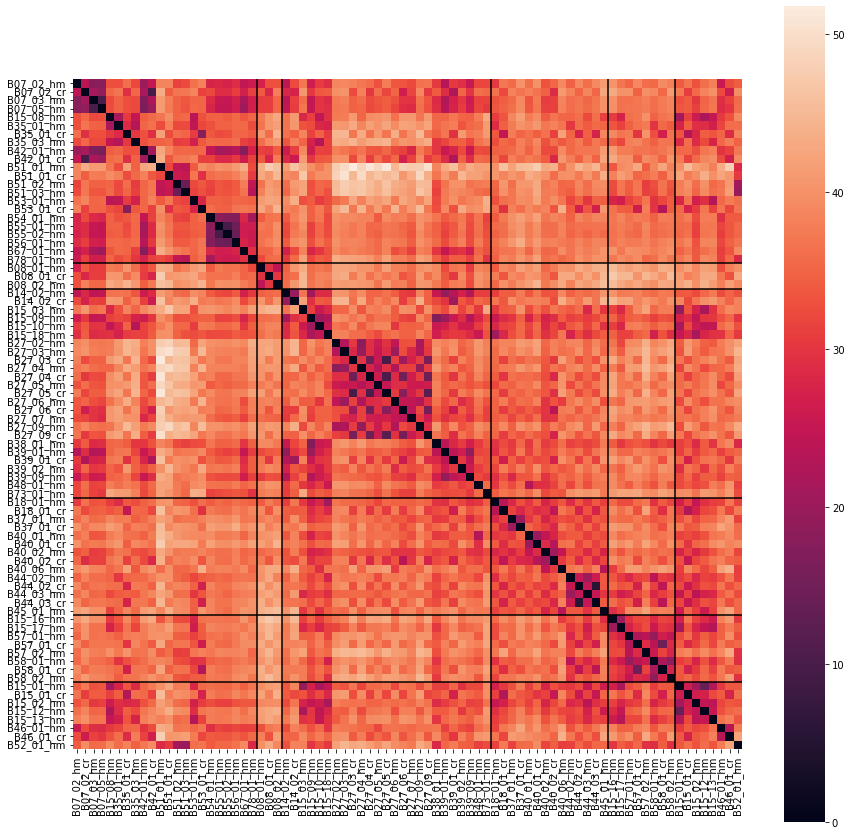

                                        /-B39 02 hm
                                       |
                                       |                    /-B38 01 hm
                              /--------|          /--------|
                             |         |         |          \-B15 09 hm
                             |         |         |
                             |          \--------|                    /-B39 09 hm
                             |                   |          /--------|
                             |                   |         |          \-B39 01 hm
                             |                    \--------|
                             |                             |          /-B39 01 cr
                             |                              \--------|
                             |                                       |          /-B14 02 hm
                             |                                        \--------|
                             

In [4]:
B_order = [
    ['B07_02_hm','B07_02_cr','B07_03_hm','B07_05_hm','B15_08_hm','B35_01_hm','B35_01_cr','B35_03_hm','B42_01_hm','B42_01_cr','B51_01_hm','B51_01_cr','B51_02_hm','B51_03_hm','B53_01_hm','B53_01_cr','B54_01_hm','B55_01_hm','B55_02_hm','B56_01_hm','B67_01_hm','B78_01_hm'],
    ['B08_01_hm','B08_01_cr','B08_02_hm'],
    ['B14_02_hm','B14_02_cr','B15_03_hm','B15_09_hm','B15_10_hm','B15_18_hm','B27_02_hm','B27_03_hm','B27_03_cr','B27_04_hm','B27_04_cr','B27_05_hm','B27_05_cr','B27_06_hm','B27_06_cr','B27_07_hm','B27_09_hm','B27_09_cr','B38_01_hm','B39_01_hm','B39_01_cr','B39_02_hm','B39_09_hm','B48_01_hm','B73_01_hm'],
    ['B18_01_hm','B18_01_cr','B37_01_hm','B37_01_cr','B40_01_hm','B40_01_cr','B40_02_hm','B40_02_cr','B40_06_hm','B44_02_hm','B44_02_cr','B44_03_hm','B44_03_cr','B45_01_hm'],
    ['B15_16_hm','B15_17_hm','B57_01_hm','B57_01_cr','B57_02_hm','B58_01_hm','B58_01_cr','B58_02_hm'],
    ['B15_01_hm','B15_01_cr','B15_02_hm','B15_12_hm','B15_13_hm','B46_01_hm','B46_01_cr','B52_01_hm']
    ]

Mat = CalcMat("../Figures/Figure1_compare_to_existing/HLA-B/DAT", "../Figures/Figure1_compare_to_existing/HLA-B/HLA-B.csv", contact=contact, weight=weight)
heatmap(Mat, B_order, size=(15,15))
Matrix2Dendro(Mat)

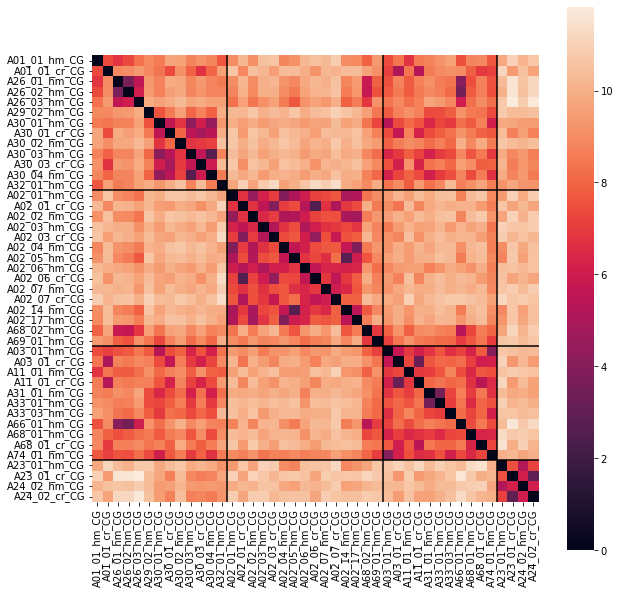

                    /-A29 02 hm CG
          /--------|
         |         |          /-A33 01 hm CG
         |          \--------|
         |                    \-A31 01 hm CG
         |
         |                    /-A30 02 hm CG
         |                   |
         |          /--------|                    /-A30 03 cr CG
         |         |         |          /--------|
         |         |         |         |          \-A30 01 cr CG
         |         |          \--------|
         |         |                   |          /-A30 01 hm CG
         |         |                    \--------|
         |         |                             |          /-A30 04 hm CG
         |         |                              \--------|
         |         |                                        \-A30 03 hm CG
         |---------|
         |         |                    /-A74 01 hm CG
         |         |          /--------|
         |         |         |          \-A03 01 hm CG
         |     

In [5]:
A_CG_order = [
    ['A01_01_hm_CG', 'A01_01_cr_CG', 'A26_01_hm_CG', 'A26_02_hm_CG', 'A26_03_hm_CG', 'A29_02_hm_CG', 'A30_01_hm_CG', 'A30_01_cr_CG', 'A30_02_hm_CG', 'A30_03_hm_CG', 'A30_03_cr_CG', 'A30_04_hm_CG', 'A32_01_hm_CG'],
    ['A02_01_hm_CG', 'A02_01_cr_CG', 'A02_02_hm_CG', 'A02_03_hm_CG', 'A02_03_cr_CG', 'A02_04_hm_CG', 'A02_05_hm_CG', 'A02_06_hm_CG', 'A02_06_cr_CG', 'A02_07_hm_CG', 'A02_07_cr_CG', 'A02_14_hm_CG', 'A02_17_hm_CG', 'A68_02_hm_CG', 'A69_01_hm_CG'],
    ['A03_01_hm_CG', 'A03_01_cr_CG', 'A11_01_hm_CG', 'A11_01_cr_CG', 'A31_01_hm_CG', 'A33_01_hm_CG', 'A33_03_hm_CG', 'A66_01_hm_CG', 'A68_01_hm_CG', 'A68_01_cr_CG', 'A74_01_hm_CG'],
    ['A23_01_hm_CG', 'A23_01_cr_CG', 'A24_02_hm_CG', 'A24_02_cr_CG']
    ]

Mat = CGCalcMat("../Figures/Figure1_compare_to_existing/HLA-A/CG_DAT", "../Figures/Figure1_compare_to_existing/HLA-A/HLA-A_CG.csv", contact=contact, weight=weight)
heatmap(Mat, A_CG_order)
Matrix2Dendro(Mat)

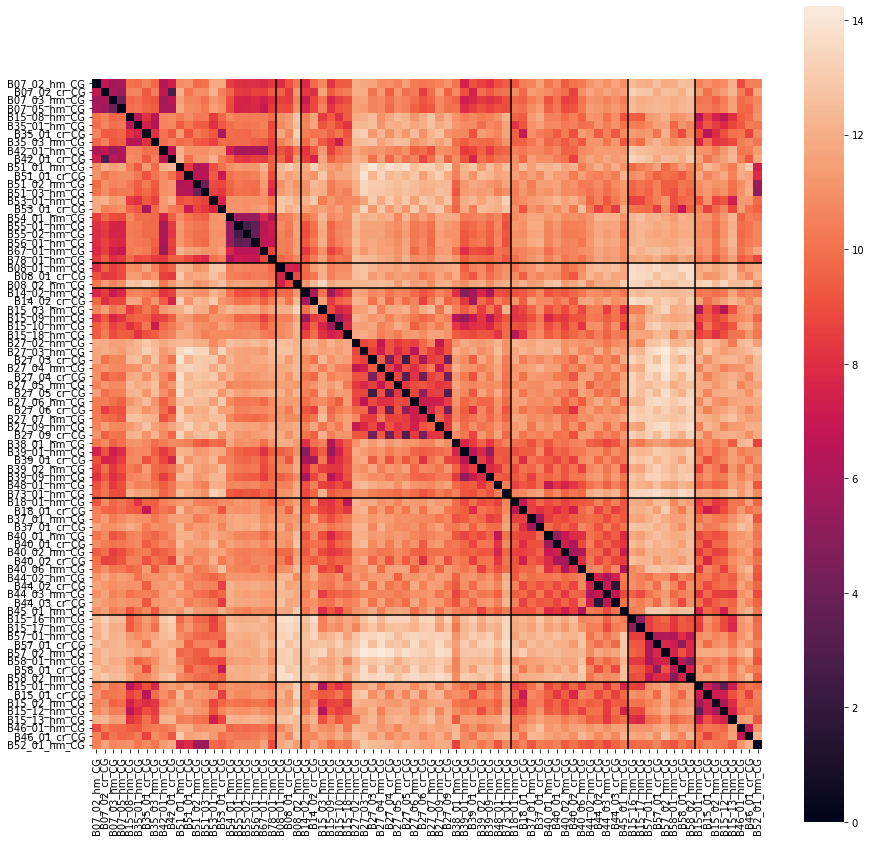

                              /-B37 01 hm CG
                    /--------|
                   |          \-B37 01 cr CG
                   |
                   |                              /-B44 03 cr CG
                   |                    /--------|
                   |                   |          \-B44 02 cr CG
                   |          /--------|
                   |         |         |          /-B44 03 hm CG
          /--------|         |          \--------|
         |         |         |                    \-B44 02 hm CG
         |         |         |
         |         |         |                                        /-B15 17 hm CG
         |         |         |                              /--------|
         |         |         |                             |          \-B15 16 hm CG
         |         |         |                             |
         |         |         |                    /--------|                    /-B58 01 cr CG
         |         |       

In [7]:
B_CG_order = [
    ['B07_02_hm_CG','B07_02_cr_CG','B07_03_hm_CG','B07_05_hm_CG','B15_08_hm_CG','B35_01_hm_CG','B35_01_cr_CG','B35_03_hm_CG','B42_01_hm_CG','B42_01_cr_CG','B51_01_hm_CG','B51_01_cr_CG','B51_02_hm_CG','B51_03_hm_CG','B53_01_hm_CG','B53_01_cr_CG','B54_01_hm_CG','B55_01_hm_CG','B55_02_hm_CG','B56_01_hm_CG','B67_01_hm_CG','B78_01_hm_CG'],
    ['B08_01_hm_CG','B08_01_cr_CG','B08_02_hm_CG'],
    ['B14_02_hm_CG','B14_02_cr_CG','B15_03_hm_CG','B15_09_hm_CG','B15_10_hm_CG','B15_18_hm_CG','B27_02_hm_CG','B27_03_hm_CG','B27_03_cr_CG','B27_04_hm_CG','B27_04_cr_CG','B27_05_hm_CG','B27_05_cr_CG','B27_06_hm_CG','B27_06_cr_CG','B27_07_hm_CG','B27_09_hm_CG','B27_09_cr_CG','B38_01_hm_CG','B39_01_hm_CG','B39_01_cr_CG','B39_02_hm_CG','B39_09_hm_CG','B48_01_hm_CG','B73_01_hm_CG'],
    ['B18_01_hm_CG','B18_01_cr_CG','B37_01_hm_CG','B37_01_cr_CG','B40_01_hm_CG','B40_01_cr_CG','B40_02_hm_CG','B40_02_cr_CG','B40_06_hm_CG','B44_02_hm_CG','B44_02_cr_CG','B44_03_hm_CG','B44_03_cr_CG','B45_01_hm_CG'],
    ['B15_16_hm_CG','B15_17_hm_CG','B57_01_hm_CG','B57_01_cr_CG','B57_02_hm_CG','B58_01_hm_CG','B58_01_cr_CG','B58_02_hm_CG'],
    ['B15_01_hm_CG','B15_01_cr_CG','B15_02_hm_CG','B15_12_hm_CG','B15_13_hm_CG','B46_01_hm_CG','B46_01_cr_CG','B52_01_hm_CG']
    ]

Mat = CGCalcMat("../Figures/Figure1_compare_to_existing/HLA-B/CG_DAT", "../Figures/Figure1_compare_to_existing/HLA-B/HLA-B_CG.csv", contact=contact, weight=weight)
heatmap(Mat, B_CG_order, size=(15,15))
Matrix2Dendro(Mat)